In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu

## HateXplain

In [3]:
# load saved predictions and check distribution of labels
lconf_og_full = pd.read_csv("../data/hatexplain/lconf_original_full.csv")
lconf_aave_full = pd.read_csv("../data/hatexplain/lconf_aave_full.csv")
lconf_nigerianD_full = pd.read_csv("../data/hatexplain/lconf_nigerianD_full.csv")
lconf_indianD_full = pd.read_csv("../data/hatexplain/lconf_indianD_full.csv")
lconf_singlish_full = pd.read_csv("../data/hatexplain/lconf_singlish_full.csv")

print(Counter(lconf_og_full["label"]))
print(Counter(lconf_aave_full["label"]))
print(Counter(lconf_nigerianD_full["label"]))
print(Counter(lconf_indianD_full["label"]))
print(Counter(lconf_singlish_full["label"]))

Counter({1.0: 15377, 0.0: 4771})
Counter({1.0: 15081, 0.0: 5067})
Counter({1.0: 15257, 0.0: 4891})
Counter({1.0: 14833, 0.0: 5315})
Counter({1.0: 15077, 0.0: 5071})


In [5]:
# test if lconf_og_1k is normally distributed
stat, p = shapiro(lconf_og_full["confidence"])
print('Statistics=%e, p=%e' % (stat, p)) # p < 0.05, not normal

stat, p = shapiro(lconf_aave_full["confidence"])
print('Statistics=%e, p=%e' % (stat, p)) # p < 0.05, not normal
stat, p = shapiro(lconf_nigerianD_full["confidence"])
print('Statistics=%e, p=%e' % (stat, p)) # p < 0.05, not normal
stat, p = shapiro(lconf_indianD_full["confidence"])
print('Statistics=%e, p=%e' % (stat, p)) # p < 0.05, not normal
stat, p = shapiro(lconf_singlish_full["confidence"])
print('Statistics=%e, p=%e' % (stat, p)) # p < 0.05, not normal

Statistics=7.120689e-01, p=5.558901e-102
Statistics=7.221566e-01, p=4.447326e-101
Statistics=7.180718e-01, p=1.901092e-101
Statistics=7.293955e-01, p=2.060496e-100
Statistics=7.211743e-01, p=3.621678e-101


/tmp/ipykernel_135018/970521783.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20148.
  stat, p = shapiro(lconf_og_full["confidence"])
/tmp/ipykernel_135018/970521783.py:6: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20148.
  stat, p = shapiro(lconf_aave_full["confidence"])
/tmp/ipykernel_135018/970521783.py:8: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20148.
  stat, p = shapiro(lconf_nigerianD_full["confidence"])
/tmp/ipykernel_135018/970521783.py:10: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20148.
  stat, p = shapiro(lconf_indianD_full["confidence"])
/tmp/ipykernel_135018/970521783.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20148.
  stat, p = shapiro(lconf_singlish_full["confidence"])


In [6]:
# KS test for prediction confidence on Davidson
print("overall: KS test for prediction confidence original vs. dialects")
stat, p = ks_2samp([abs(c) for c in lconf_og_full["confidence"]], [abs(c) for c in lconf_aave_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp([abs(c) for c in lconf_og_full["confidence"]], [abs(c) for c in lconf_nigerianD_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp([abs(c) for c in lconf_og_full["confidence"]], [abs(c) for c in lconf_indianD_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp([abs(c) for c in lconf_og_full["confidence"]], [abs(c) for c in lconf_singlish_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))

overall: KS test for prediction confidence original vs. dialects
Statistics=2.799285e-02, p=2.724284e-07
Statistics=2.178876e-02, p=1.381119e-04
Statistics=3.682748e-02, p=2.627361e-12
Statistics=2.010125e-02, p=5.746133e-04


In [7]:
# more KS test: cross-dialect confidence differences (aave against other 3)
stat, p = ks_2samp([abs(c) for c in lconf_aave_full["confidence"]], [abs(c) for c in lconf_nigerianD_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp([abs(c) for c in lconf_aave_full["confidence"]], [abs(c) for c in lconf_indianD_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp([abs(c) for c in lconf_aave_full["confidence"]], [abs(c) for c in lconf_singlish_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))

Statistics=9.330951e-03, p=3.421918e-01
Statistics=1.404606e-02, p=3.720377e-02
Statistics=1.131626e-02, p=1.503265e-01


In [8]:
# Mann Whitney U test for prediction confidence on Davidson
print("overall: Mann Whitney U test for prediction confidence original vs. dialects")
stat, p = mannwhitneyu([abs(c) for c in lconf_og_full["confidence"]], [abs(c) for c in lconf_aave_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))
stat, p = mannwhitneyu([abs(c) for c in lconf_og_full["confidence"]], [abs(c) for c in lconf_nigerianD_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))
stat, p = mannwhitneyu([abs(c) for c in lconf_og_full["confidence"]], [abs(c) for c in lconf_indianD_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))
stat, p = mannwhitneyu([abs(c) for c in lconf_og_full["confidence"]], [abs(c) for c in lconf_singlish_full["confidence"]])
print('Statistics=%e, p=%e' % (stat, p))

overall: Mann Whitney U test for prediction confidence original vs. dialects
Statistics=2.101440e+08, p=8.063761e-10
Statistics=2.086300e+08, p=1.253675e-06
Statistics=2.130052e+08, p=8.380298e-18
Statistics=2.081230e+08, p=1.021033e-05


In [9]:
# average confidence of toxic predictions
print("toxic -------------------")
print(np.average([abs(c) for c in lconf_og_full["confidence"] if c < 0]))
print(np.average([abs(c) for c in lconf_aave_full["confidence"] if c < 0]))
print(np.average([abs(c) for c in lconf_nigerianD_full["confidence"] if c < 0]))
print(np.average([abs(c) for c in lconf_indianD_full["confidence"] if c < 0]))
print(np.average([abs(c) for c in lconf_singlish_full["confidence"] if c < 0]))

# average confidence of non-toxic predictions
print("non-toxic ---------------")
print(np.average([abs(c) for c in lconf_og_full["confidence"] if c > 0]))
print(np.average([abs(c) for c in lconf_aave_full["confidence"] if c > 0]))
print(np.average([abs(c) for c in lconf_nigerianD_full["confidence"] if c > 0]))
print(np.average([abs(c) for c in lconf_indianD_full["confidence"] if c > 0]))
print(np.average([abs(c) for c in lconf_singlish_full["confidence"] if c > 0]))

toxic -------------------
0.8150816701700002
0.8075121585747804
0.8087509785558274
0.8050924247309192
0.8106455145752255
non-toxic ---------------
0.654921863157028
0.6523889296619949
0.6497493973175116
0.6518566252146817
0.6524585054320853


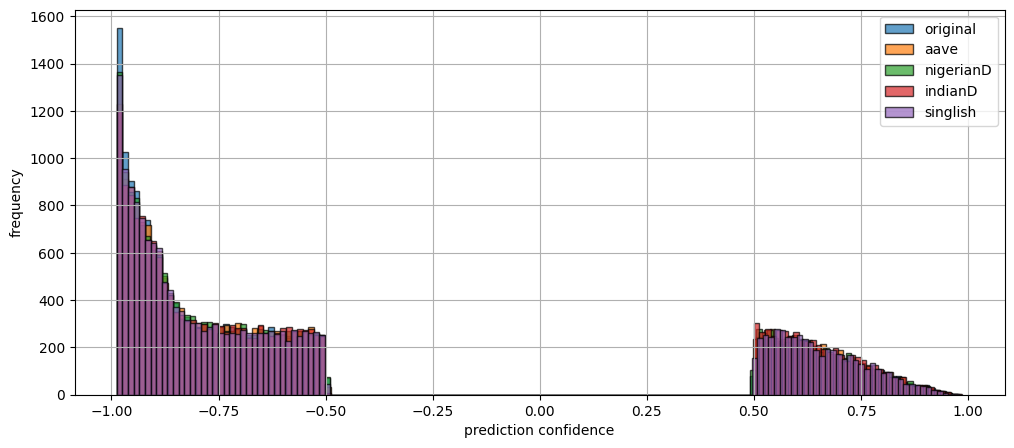

In [10]:
# plot prediction confidence of different dialects
plt.figure(figsize=(12, 5))

plt.hist(lconf_og_full["confidence"], bins=150, edgecolor='black', alpha=0.7, label="original")
plt.hist(lconf_aave_full["confidence"], bins=150, edgecolor='black', alpha=0.7, label="aave")
plt.hist(lconf_nigerianD_full["confidence"], bins=150, edgecolor='black', alpha=0.7, label="nigerianD")
plt.hist(lconf_indianD_full["confidence"], bins=150, edgecolor='black', alpha=0.7, label="indianD")
plt.hist(lconf_singlish_full["confidence"], bins=150, edgecolor='black', alpha=0.7, label="singlish")

plt.xlabel('prediction confidence')
plt.ylabel('frequency')
plt.legend()
plt.grid(True)
plt.show()

## TwitterAAE

In [12]:
lconf_aae = pd.read_csv("../data/twitter_aae/lconf_aa250.csv")
lconf_wh = pd.read_csv("../data/twitter_aae/lconf_wh250.csv")
lconf_aave_synth = pd.read_csv("../data/twitter_aae/lconf_aave250_synth.csv")

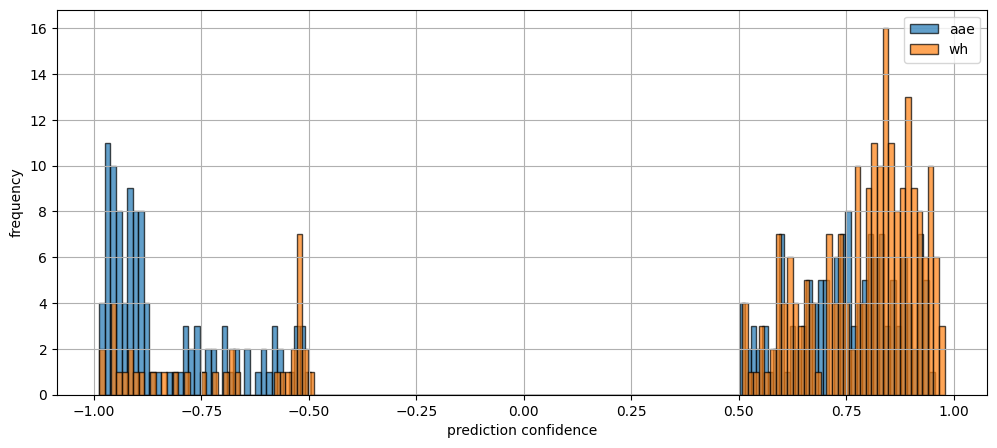

In [13]:
# plot prediction confidence of different dialects
plt.figure(figsize=(12, 5))

plt.hist(lconf_aae["confidence"], bins=150, edgecolor='black', alpha=0.7, label="aae")
plt.hist(lconf_wh["confidence"], bins=150, edgecolor='black', alpha=0.7, label="wh")

plt.xlabel('prediction confidence')
plt.ylabel('frequency')
plt.legend()
plt.grid(True)
plt.show()